In [45]:
import os
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import json
import cv2
import util.collection_util as cu # content 폴더에 util 폴더 만들고 안에 .py 파일 넣기

In [25]:
dataset_dir = '20200205_KT_GEN_1_pkl'

In [39]:
with open(os.path.join('metadata.json')) as f:
    metadata = json.load(f)
metadata['segment_counts']['20200205_KT_GEN_1']

938

In [54]:
ff = open('train_lol.txt', 'r')
lines = ff.readlines()

with open(os.path.join('metadata.json')) as f:
    metadata = json.load(f)
num = metadata['segment_counts'][dataset_dir.replace('_pkl','')]
    
new_line = []
index = [n for n in range(num)]
for m in range(num):
    new_line.append(lines[index[m]])
    
new_line

['frame0.jpg,0\n',
 'frame1.jpg,0\n',
 'frame2.jpg,0\n',
 'frame3.jpg,0\n',
 'frame4.jpg,0\n',
 'frame5.jpg,0\n',
 'frame6.jpg,0\n',
 'frame7.jpg,0\n',
 'frame8.jpg,0\n',
 'frame9.jpg,0\n',
 'frame10.jpg,0\n',
 'frame11.jpg,0\n',
 'frame12.jpg,0\n',
 'frame13.jpg,0\n',
 'frame14.jpg,0\n',
 'frame15.jpg,0\n',
 'frame16.jpg,0\n',
 'frame17.jpg,0\n',
 'frame18.jpg,0\n',
 'frame19.jpg,0\n',
 'frame20.jpg,0\n',
 'frame21.jpg,0\n',
 'frame22.jpg,0\n',
 'frame23.jpg,0\n',
 'frame24.jpg,0\n',
 'frame25.jpg,0\n',
 'frame26.jpg,0\n',
 'frame27.jpg,0\n',
 'frame28.jpg,0\n',
 'frame29.jpg,0\n',
 'frame30.jpg,0\n',
 'frame31.jpg,0\n',
 'frame32.jpg,0\n',
 'frame33.jpg,0\n',
 'frame34.jpg,0\n',
 'frame35.jpg,0\n',
 'frame36.jpg,0\n',
 'frame37.jpg,0\n',
 'frame38.jpg,0\n',
 'frame39.jpg,0\n',
 'frame40.jpg,0\n',
 'frame41.jpg,0\n',
 'frame42.jpg,0\n',
 'frame43.jpg,0\n',
 'frame44.jpg,0\n',
 'frame45.jpg,0\n',
 'frame46.jpg,0\n',
 'frame47.jpg,0\n',
 'frame48.jpg,0\n',
 'frame49.jpg,0\n',
 'frame50.

In [51]:
def generator_train_batch(train_txt,batch_size,num_classes,img_path):
    ff = open(train_txt, 'r')
    lines = ff.readlines()
    num = len(lines)
    while True:
        new_line = []
        index = [n for n in range(num)]
        random.shuffle(index)
        for m in range(num):
            new_line.append(lines[index[m]])
        for i in range(int(num/batch_size)): # batch_size: 동영상 몇 개씩 묶을지
            a = i*batch_size
            b = (i+1)*batch_size
            x_train, x_labels = process_batch(new_line[a:b],img_path,train=True)
            x = preprocess(x_train)
            y = np_utils.to_categorical(np.array(x_labels), num_classes)
            x = np.transpose(x, (0,2,3,1,4))
            yield x, y
            


generator_train_batch(train_file,batch_size,num_classes,img_path)

<generator object generator_train_batch at 0x000002E96E8B0348>

In [66]:
ff = open('train_lol.txt', 'r')
lines = ff.readlines()
num = len(lines)

train_txt = 'train_lol.txt'
batch_size = 16
num_classes = 2
img_path = './captures/'

new_line = []
index = [n for n in range(num)]

def process_batch(lines,img_path,train=True):
    num = len(lines) # 예를 들면 1시간 동영상을 0.5초 간격으로 캡쳐했을 때 그 동영상들의 갯수. train_txt 파일 안에 적혀져 있음
    batch = np.zeros((num,6,64,64,3),dtype='float32') 
    labels = np.zeros(num,dtype='int')
    for i in range(num):
        path = lines[i].split(',')[0] # ex) frame0.jpg, test1.jpg
        label = lines[i].split(',')[1] # ex) 0, 1
        #symbol = lines[i].split(' ')[1]
        label = label.strip('\n')
        label = int(label)
        #symbol = int(symbol)-1
        #imgs = os.listdir(img_path)
        #imgs.sort(key=str.lower)
        if train:
            crop_x = random.randint(0, 15)
            crop_y = random.randint(0, 58)
            is_flip = random.randint(0, 1)
            for j in range(6):
                #img = imgs[symbol + j]
                image = cv2.imread(img_path + path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (171, 128))
                if is_flip == 1:
                    image = cv2.flip(image, 1)
                batch[i][j][:][:][:] = image[crop_x:crop_x + 64, crop_y:crop_y + 64, :]
            labels[i] = label
        else:
            for j in range(6):
                #img = imgs[symbol + j]
                image = cv2.imread(img_path + path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (171, 128))
                batch[i][j][:][:][:] = image[8:72, 30:94, :]
            labels[i] = label
    return batch, labels


def preprocess(inputs):
    inputs[..., 0] -= 99.9
    inputs[..., 1] -= 92.1
    inputs[..., 2] -= 82.6
    inputs[..., 0] /= 65.8
    inputs[..., 1] /= 62.3
    inputs[..., 2] /= 60.3
    # inputs /=255.
    # inputs -= 0.5
    # inputs *=2.
    return inputs

for m in range(num):
    new_line.append(lines[index[m]])
for i in range(int(num/batch_size)): # batch_size: 동영상 몇 개씩 묶을지
    a = i*batch_size
    b = (i+1)*batch_size
    x_train, x_labels = process_batch(new_line[a:b],img_path,train=True)
    #x = preprocess(y_test)
    #x = np.transpose(x,(0,2,3,1,4))
    #y = np_utils.to_categorical(np.array(y_labels), num_classes)


In [68]:
x_train.shape

(16, 6, 64, 64, 3)

In [70]:
x_labels.shape

(16,)

In [62]:
int(num/batch_size)

480

In [26]:
segment_path = os.path.join(dataset_dir, r'seg_00037_0.pkl')

In [27]:
segment = cu.load(segment_path)

In [7]:
segment.keys()

dict_keys(['video', 'audio', 'label', 'start_sec', 'end_sec', 'total_duration'])

In [28]:
video = segment['video']
video.shape, video.dtype

((15, 64, 64, 3), dtype('float16'))

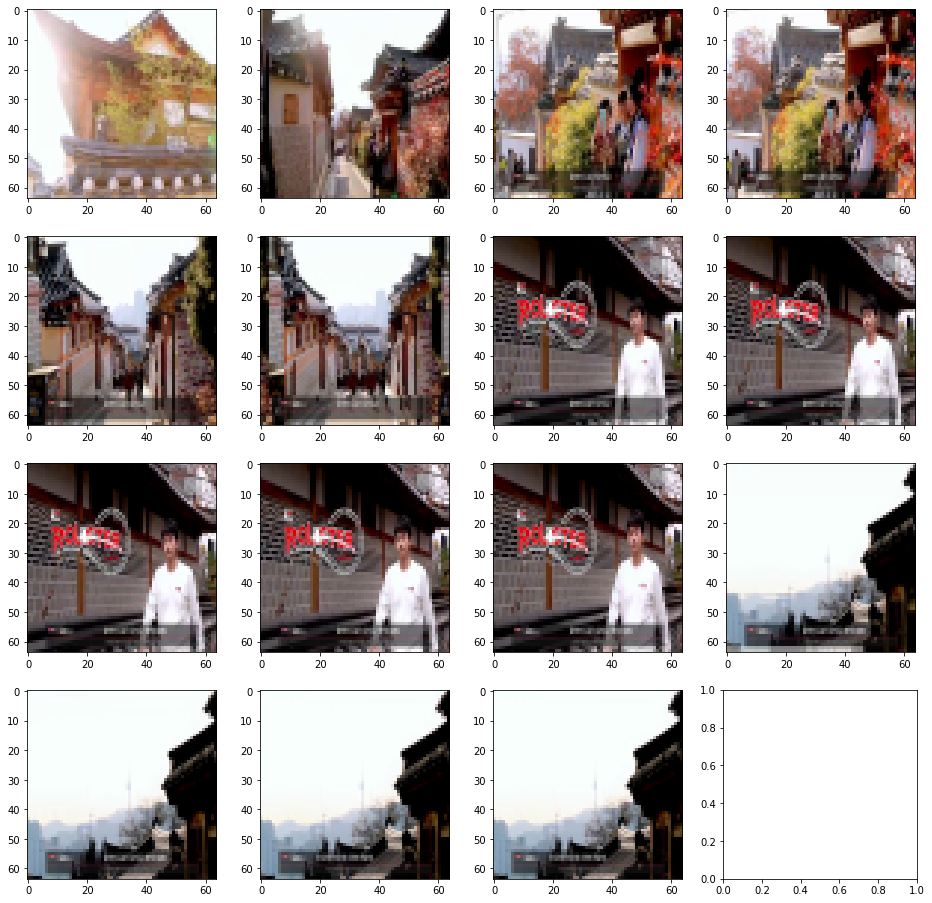

In [9]:
rowscols = math.ceil(math.sqrt(video.shape[0]))

fig, axes = plt.subplots(rowscols, rowscols, figsize=(16, 16))
axes = axes.flatten()

for ax, image in zip(axes, video):
    ax.imshow(image.astype(np.float32))

In [29]:
for j, image in enumerate(video):
      print(j, type(image.shape))

0 <class 'tuple'>
1 <class 'tuple'>
2 <class 'tuple'>
3 <class 'tuple'>
4 <class 'tuple'>
5 <class 'tuple'>
6 <class 'tuple'>
7 <class 'tuple'>
8 <class 'tuple'>
9 <class 'tuple'>
10 <class 'tuple'>
11 <class 'tuple'>
12 <class 'tuple'>
13 <class 'tuple'>
14 <class 'tuple'>


In [12]:
path = os.listdir('20200205_KT_GEN_1_pkl')
path[900][10]

'0'

In [19]:
dataset_dir = '20200205_KT_GEN_1_pkl'

path = os.listdir(dataset_dir)

segment_path  = os.path.join(dataset_dir, path[0]) # path[i]는 

segment = cu.load(segment_path)

video = segment['video']
video.shape, video.dtype

((15, 64, 64, 3), dtype('float16'))

In [40]:
# 현재 '20200205_KT_GEN_1'이 938개의 피클로 이루어졌고 각각 15장의 사진이 들어가있음
num = metadata['segment_counts']['20200205_KT_GEN_1'] # 938

# 하나의 큰 배치가 될 5차원 영행렬
batch = np.zeros((num,15,64,64,3),dtype='float32')

# 0,1 라벨이 담길 1차원 영행렬
labels = np.zeros(num,dtype='int')

dataset_dir = '20200205_KT_GEN_1_pkl'
path = os.listdir(dataset_dir)

for i in range(num):
    labels[i] = path[i][10] # 피클 파일명에서 레이블을 뽑음. 0또는 1
    segment_path  = os.path.join(dataset_dir, path[i])
    segment = cu.load(segment_path)
    video = segment['video']
    for j, image in enumerate(video):
        batch[i][j][:][:][:] = image
        
print(batch.shape)

(938, 15, 64, 64, 3)


In [ ]:
segment_path = os.path.join(dataset_dir, r'seg_00037_0.pkl')
# 예를 들면 1시간 동영상을 0.5초 간격으로 캡쳐했을 때 그 사진들의 갯수. 
# 현재 '20200205_KT_GEN_1'이 938개의 피클로 이루어졌고 각각 15장의 사진이 들어가있음

num = 938 
batch = np.zeros((num,15,64,64,3),dtype='float32')
labels = np.zeros(num,dtype='int')
path = os.listdir('20200205_KT_GEN_1_pkl')
for i in range(num):
    labels[i] = path[i][10] # 피클 파일명에서 레이블을 뽑음. 0또는 1
    for j, image in enumerate(video):
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        batch[i][j][:][:][:] = image